In [1]:
from scipy.spatial.distance import cdist,pdist

import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randint

In [9]:
import os
import sys
#SERVE PER POTER IMPORTARE I FILE .PY DALLA CARTELLA SOURCE
sys.path.append('..')
sys.path.append('..\data')
from sklearn.decomposition import PCA

#ora src è un pacchetto e posso usare la classica dot notation di python
from src.data_load_notebook  import *
#import pandas as pd
# ||||||||||è un utilizzo un pò improprio di import, basta ricordare che così importiamo pandas
from src import classes
from src import funzioni
from src import cluster_routine
import numpy as np

In [3]:
picchi1 = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':(None,None)})
picchi2 = classes.Spettri(data2,npicchi=None,prop={'height':(None,None),'prominence':(None,None)})
picchi1.peakfinder()
picchi2.peakfinder()
picchi1.featextract()
picchi2.featextract()
pass

#### *cluster_routine.py* 

Contiene routine per sondare velocemente con più traning per diversi parametri
e valutare sommartiamente quali sono preferibili.
Ovviamente non a sostituire un *Hyperparameter Tuning* con *GridSearchCV* e *Pipelines*, ma per orientarsi semmai in attesa di una definizione soddisfacente di uno *scoring*

con 2 clusters : 0.5648418681606215
con 3 clusters : 0.5436473640701032
con 4 clusters : 0.5673766184837202
con 5 clusters : 0.5669814485776161
con 6 clusters : 0.5679993405887451
con 7 clusters : 0.5671540174893888
con 8 clusters : 0.5870085155656395
con 9 clusters : 0.604168578427124
con 10 clusters : 0.5996473563431602


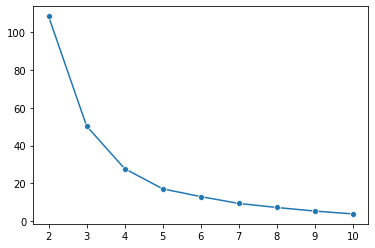

con 2 clusters : 0.6771696700783283
con 3 clusters : 0.6881969699854605
con 4 clusters : 0.5471879572196823
con 5 clusters : 0.5217580454505552
con 6 clusters : 0.5575639612228147
con 7 clusters : 0.5514725913701582
con 8 clusters : 0.5662575744251742
con 9 clusters : 0.5674196016013966
con 10 clusters : 0.5549636065068921


In [29]:
#il parametro plot: Bool controlla se plottare l'andamento del coefficente .inertia mostro un esempioper picchi1
km1_list= cluster_routine.km_cluster_plt(picchi1.feature, pca =1, plot = True)
km2_list =  cluster_routine.km_cluster_plt(picchi2.feature, pca = 1)
#feat_picchi1['labels_km']=  km1_list[1].labels_
#feat_picchi2['labels_km']= km2_list[1].labels_


# target qualitativo

P

<AxesSubplot:>

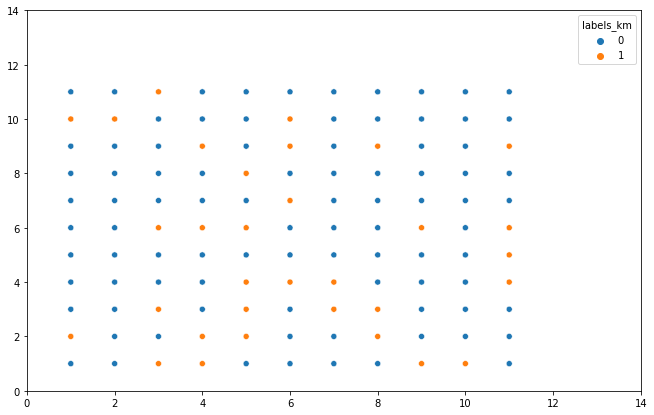

In [27]:
l = [(x,y) for x in range(1,12) for y in range(1,12)]
grid = np.array(l).astype(float)
plt.xlim(0,14)
plt.ylim(0,14)
fig = plt.gcf()
fig.set_size_inches(11, 7)
sns.scatterplot(x = grid[:,0], y = grid[:,1], hue = feat_picchi1['labels_km'])
#np.unique(feat_picchi2['labels_km'],return_counts = True)


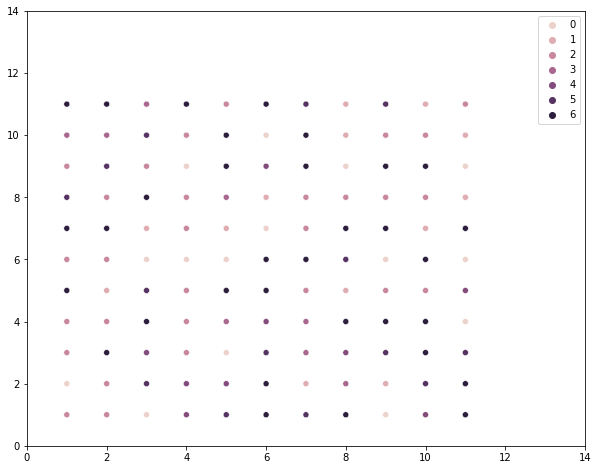

In [28]:
funzioni.distpoint(km1_list[5].labels_)

In [ ]:
l = [(x,y) for x in range(1,12) for y in range(1,12)]
grid = np.array(l).astype(float)
np.mean(pdist(grid))

In [ ]:
feat_picchi1= picchi1.featextract(cols=['peak_heights','prominences','K'],statlist=['mean','std','count'])
feat_picchi2 = picchi2.featextract(cols=['peak_heights','prominences','K'], statlist=['mean','std','count'])
db1list = cluster_routine.db_cluster_plt(feat_picchi1,n_components=2, eps= 0.3, min_samples=5)


In [ ]:
feat_picchi1['labels_db'] = db1list[-5].labels_

for lab in np.unique(feat_picchi2['labels_db'])[:]:
    mean = np.mean(pdist(funzioni.index_translate(feat_picchi2[feat_picchi2['labels_db']==lab].index )))
    print(f'per la label {lab} abbiamo come distanza media: {mean}')

In [ ]:
db2list = cluster_routine.db_cluster_plt(feat_picchi2)
feat_picchi1['labels_db'] = db1list[-5].labels_
funzioni.distpoint(feat_picchi1[feat_picchi1['labels_db']==0].index)

In [ ]:
feat_picchi2['labels_db'] = db2list[4].labels_


In [ ]:

np.mean(pdist(funzioni.index_translate(feat_picchi1[feat_picchi1['labels_db']==3].index)))

In [ ]:
len(funzioni.index_translate(feat_picchi1[feat_picchi1['labels_db']==0].index))

In [ ]:
63*62/2